## MAP and nDCG 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools

In [13]:
labels = ["none", "paiceHusk", "krovetz", "sStripping", "porter2", "lovins"]
map = [0.222357, 0.273885, 0.270678, 0.245353, 0.266312, 0.249784]
nDCG = [0.442813, 0.537582, 0.501087, 0.494990, 0.523511, 0.464134]

data = {"Stemmer": labels, "MAP": map, "nDCG": nDCG}
df = pd.DataFrame(data=data)
df = df.melt(id_vars="Stemmer").rename({"variable": "Measure", "value": "Score"}, axis="columns")

In [14]:
print(df)

       Stemmer Measure     Score
0         none     MAP  0.222357
1    paiceHusk     MAP  0.273885
2      krovetz     MAP  0.270678
3   sStripping     MAP  0.245353
4      porter2     MAP  0.266312
5       lovins     MAP  0.249784
6         none    nDCG  0.442813
7    paiceHusk    nDCG  0.537582
8      krovetz    nDCG  0.501087
9   sStripping    nDCG  0.494990
10     porter2    nDCG  0.523511
11      lovins    nDCG  0.464134


Text(0.5, 1.0, 'MAP and nDCG Scores for Various Stemming Algorithms on the WSJ Collection')

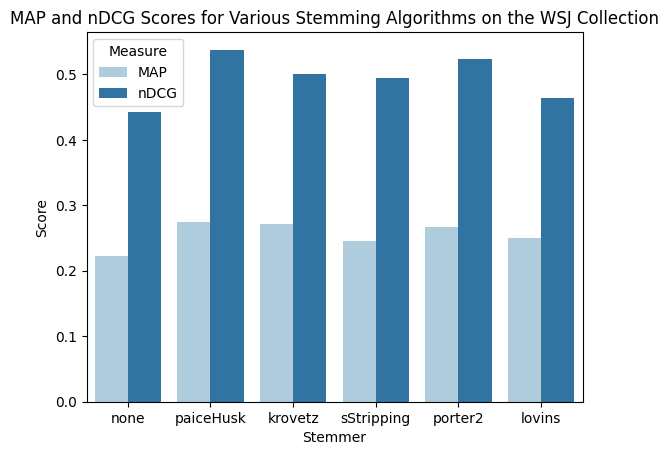

In [4]:
sns.barplot(x="Stemmer", y="Score", hue="Measure", data=df, palette=sns.color_palette("Paired"))
plt.title("MAP and nDCG Scores for Various Stemming Algorithms on the WSJ Collection")

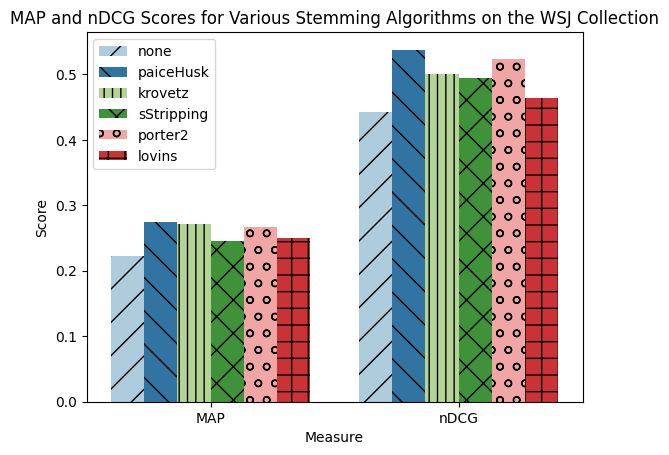

In [25]:
ax = sns.barplot(x="Measure", y="Score", hue="Stemmer", data=df, palette=sns.color_palette("Paired"))
hatches = itertools.cycle([ "/", "\\", "||", "x", "o", "+", "-"])
num_stemmers = 2
for i, bar in enumerate(ax.patches):
    if i % num_stemmers == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)
ax.legend(loc="best")
plt.title("MAP and nDCG Scores for Various Stemming Algorithms on the WSJ Collection")
plt.show()

## Average F-Measure vs MAP and Average F-Measure vs nDCG

In [6]:
from os import path

data_dir = path.join("Data","wikt")
labels = ["wiktionary", "paiceHusk", "krovetz", "sStripping", "porter2", "lovins"]

paiceHusk_before_cluster_fmeasures = np.loadtxt(path.join(data_dir, "paiceHusk_before_cluster_fmeasures.csv"))
krovetz_before_cluster_fmeasures = np.loadtxt(path.join(data_dir, "krovetz_before_cluster_fmeasures.csv"))
sStripping_before_cluster_fmeasures = np.loadtxt(path.join(data_dir, "sStripping_before_cluster_fmeasures.csv"))
porter2_before_cluster_fmeasures = np.loadtxt(path.join(data_dir, "porter2_before_cluster_fmeasures.csv"))
lovins_before_cluster_fmeasures = np.loadtxt(path.join(data_dir, "lovins_before_cluster_fmeasures.csv"))

before = [paiceHusk_before_cluster_fmeasures, krovetz_before_cluster_fmeasures, sStripping_before_cluster_fmeasures, porter2_before_cluster_fmeasures, lovins_before_cluster_fmeasures]

averages = list()
for stemmer in before:
    averages.append(stemmer.mean())

data = {
    "Stemmer" : labels[1:],
    "F-Measure" : averages,
    "Marker" : ["o","^","s","*","d"],
    "Colour" : ["tab:red","tab:orange","tab:green","tab:blue","tab:purple"]
}

average_fmeasures = pd.DataFrame(data=data)
display(average_fmeasures)

,Stemmer,F-Measure,Marker,Colour
0,paiceHusk,0.615709,o,tab:red
1,krovetz,0.554588,^,tab:orange
2,sStripping,0.464913,s,tab:green
3,porter2,0.548461,*,tab:blue
4,lovins,0.583960,d,tab:purple


In [7]:
merged_df = df.merge(average_fmeasures)
merged_df

,Stemmer,Measure,Score,F-Measure,Marker,Colour
0,paiceHusk,MAP,0.273885,0.615709,o,tab:red
1,paiceHusk,nDCG,0.537582,0.615709,o,tab:red
2,krovetz,MAP,0.270678,0.554588,^,tab:orange
3,krovetz,nDCG,0.501087,0.554588,^,tab:orange
4,sStripping,MAP,0.245353,0.464913,s,tab:green
5,sStripping,nDCG,0.494990,0.464913,s,tab:green
6,porter2,MAP,0.266312,0.548461,*,tab:blue
7,porter2,nDCG,0.523511,0.548461,*,tab:blue
8,lovins,MAP,0.249784,0.583960,d,tab:purple
9,lovins,nDCG,0.464134,0.583960,d,tab:purple


### MAP

R^2: 0.40133440486262795
Pearson's R: 0.6335095933469579 (pVal: 0.251176509485115)


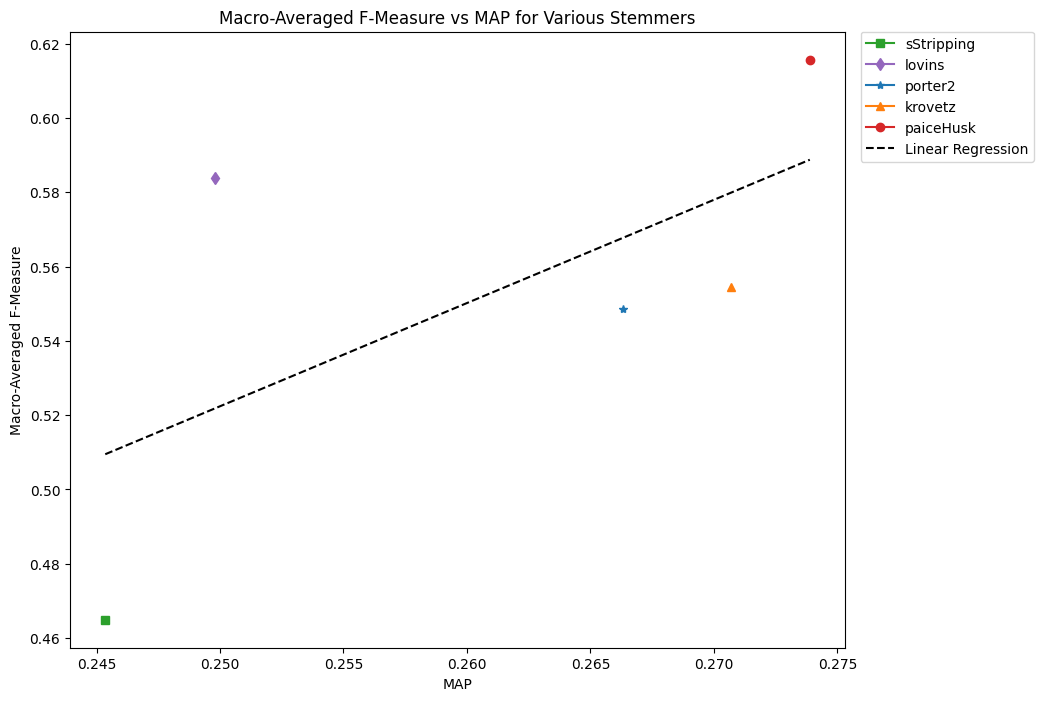

In [10]:
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

TARGET_COL = "MAP"
target_df = merged_df[merged_df["Measure"]==TARGET_COL]
target_df = target_df.sort_values(by="Score")
X = target_df["Score"].to_numpy().reshape(-1,1)
y = target_df["F-Measure"].to_numpy()

linearRegression = LinearRegression().fit(X,y)
print(f"R^2: {linearRegression.score(X, y)}")

pearsonrResult = pearsonr(X.squeeze(), y)
print(f"Pearson's R: {pearsonrResult.statistic} (pVal: {pearsonrResult.pvalue})")
plt.figure(figsize=(10,8))
for _, row in target_df.iterrows():
    plt.plot(row["Score"], row["F-Measure"], marker=row["Marker"], color=row["Colour"], label=row["Stemmer"])

y_pred = linearRegression.coef_*X+linearRegression.intercept_
plt.plot(X, y_pred, "k--", label=f"Linear Regression")
plt.title(f"Macro-Averaged F-Measure vs {TARGET_COL} for Various Stemmers")
plt.xlabel("MAP")
plt.ylabel("Macro-Averaged F-Measure")
plt.legend(bbox_to_anchor=(1.02,1),loc="upper left",borderaxespad=0)
plt.show()

### nDCG

R^2: 0.06114316934756381
Pearson's R: 0.24727144871085405 (pVal: 0.6884026437758745)


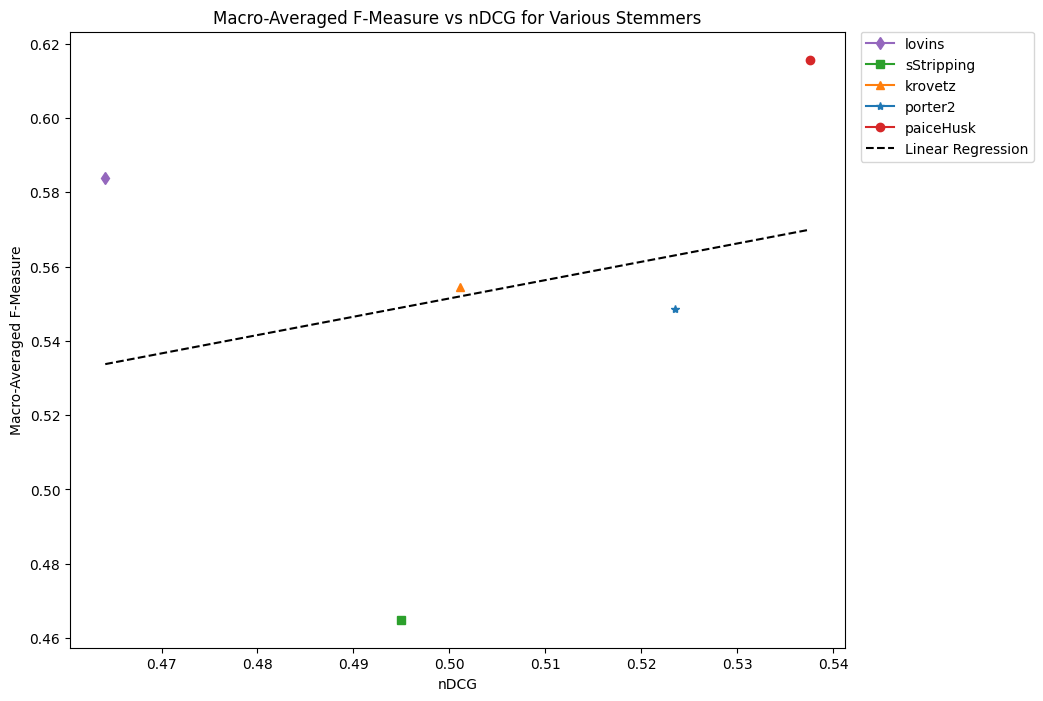

In [11]:
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

MARKERS = ["o","^","s","*","d"]
TARGET_COL = "nDCG"
target_df = merged_df[merged_df["Measure"]==TARGET_COL]
target_df = target_df.sort_values(by="Score")
X = target_df["Score"].to_numpy().reshape(-1,1)
y = target_df["F-Measure"].to_numpy()

linearRegression = LinearRegression().fit(X,y)
print(f"R^2: {linearRegression.score(X, y)}")

pearsonrResult = pearsonr(X.squeeze(), y)
print(f"Pearson's R: {pearsonrResult.statistic} (pVal: {pearsonrResult.pvalue})")
plt.figure(figsize=(10,8))
# i=0
for _, row in target_df.iterrows():
    plt.plot(row["Score"], row["F-Measure"], marker=row["Marker"], color=row["Colour"], label=row["Stemmer"])
    # i+=1

y_pred = linearRegression.coef_*X+linearRegression.intercept_
plt.plot(X, y_pred, "k--", label=f"Linear Regression")
plt.title(f"Macro-Averaged F-Measure vs {TARGET_COL} for Various Stemmers")
plt.xlabel("nDCG")
plt.ylabel("Macro-Averaged F-Measure")
plt.legend(bbox_to_anchor=(1.02,1),loc="upper left",borderaxespad=0)
plt.show()